### Daftar 20 Situs MMM yang Diblokir Kominfo, Really ??? 

url : https://www.komdigi.go.id/berita/pengumuman/detail/daftar-20-situs-mmm-yang-diblokir-kominfo

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException
from concurrent.futures import ThreadPoolExecutor

### Initialization process
    1. Created result dictionary
    2. Created chrome webdriver
    3. Created assertion using title page

In [2]:
def check_website_access(url, expected_result, assert_title=None):
    
    # Initialize the result dictionary
    result = {
        "url": url,
        "expected_result": expected_result,
        "actual_result": "fail",  # Default to fail if something goes wrong
        "timestamp": time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()),  # Will hold the timestamp
        "actual_title": None  # Will hold the actual title of the page
    }

    # Set up the Chrome WebDriver
    driver = webdriver.Chrome()

    try:
        driver.get(url)

        # Capture the actual title of the page
        result["actual_title"] = driver.title
        
        # Assert the page title if specified
        if assert_title:
            try:
                WebDriverWait(driver, 10).until(
                    EC.title_is(assert_title)  # Assert that the page title matches the expected title
                )
                result["actual_result"] = "success"  # Title matches the assertion
            except TimeoutException:
                result["actual_result"] = "fail"  # Title did not match within the timeout period
        else:
            result["actual_result"] = "success"  # If no title to assert, assume the page loaded successfully

    except WebDriverException:
        result["actual_result"] = "fail"  # If the URL failed to load
    finally:
        time.sleep(5)  # Optional sleep time to ensure everything is processed
        driver.quit()  # Close the browser after the check

    return result

### Example data : URL, Expected Results and Assert tittle

    1. url : adalah singkatan dari Uniform Resource Locator, yaitu alamat unik yang digunakan untuk mengidentifikasi dan mengakses sumber daya di internet
    2. expected_results : menunjukkan bagaimana seharusnya website (dapat di akses = success, dan tidak dapat diakses = failed )
    3. assert_title : hal paling mudah untuk memastikan bahwa web bisa diakses tentu dengan melihat langsung web nya melalui browser, namun secara teknikal automation kita bisa menggunakan dengan membuat ekspektasi tittle page yang ada pada web tepat setelah muncul ke permukaan, proses ini yang kita manfaatkan untuk melakukan validasi. bahwa optional bisa jadi, tetapi ini hal yang paling basic dapat dilakukan untuk proses validasinya.

In [3]:
# Scenario Outline (Test Cases)
test_data = [
    {"url": "https://www.Indonesia-mmm_net.com", "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmindonesialegal.com", "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.klikmmm.com",           "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.websupportmmm.com",     "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.bisnismavro.com",       "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmindonesiaclub.com",  "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmindonesian.com",     "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.bisnis3m.com",          "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmindonesia1.com",     "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmlovers.com",         "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmindo.com",           "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.lk.sergeymavrodi.com",  "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.lk.sergey-mavrodi-mmm.org","expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmcommunity.net",      "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmindonesia9.com",     "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmm-dotinfo.com",       "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.mmmincome.com",         "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.2012.sergey-mavrodi.ms","expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "https://www.2012.sergey-mavrodi-mmm.net","expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"},
    {"url": "2012.sergeymavrodi.com",             "expected_result": "fail", "assert_title": "The Arabic word ḥarām (حَرَام)"}
	
	]

### Running the tests concurrently using ThreadPoolExecutor
    1. Solusi dari jumlah list website yang di blokir sangat banyak tentu akan memperlambat bagaimana proses pengecekan satu per satu, disini kita mencoba mengimplementasikan parallel execution dengan ThreadPoolExecutor, karena pakai pytest-xdist masih gagal 

In [4]:

with ThreadPoolExecutor(max_workers=20) as executor:
    results = list(
        executor.map(
            lambda data: check_website_access(
                data["url"], 
                data["expected_result"], 
                data.get("assert_title", None)  # Default to None if "assert_title" is missing
            ), 
            test_data
        )
    )

### Convert the results to a DataFrame for better display
    1. Get results test
    2. Plot data sukses dan faild menggunakan grapik bar chart
    3. lakukan analisa 

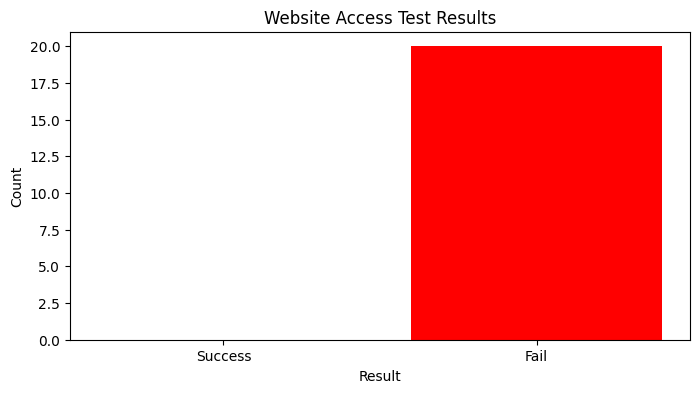

In [5]:
df_results = pd.DataFrame(results)

# Plotting the results (Success vs Fail)
success_count = df_results[df_results["actual_result"] == "success"].shape[0]
fail_count = df_results[df_results["actual_result"] == "fail"].shape[0]

# Plotting a bar chart
plt.figure(figsize=(8, 4))
plt.bar(['Success', 'Fail'], [success_count, fail_count], color=['green', 'red'])
plt.title("Website Access Test Results")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()


### Display the results as a table (including timestamp and actual title)

Perhatikan matrix pada table berikut

    1. timestamp : memberikan informasi tanggal dan jam berapa website tersebut coba diakses
    2. actual results : fail, menunjukkan 20 website tersebut gagal diakses
    3. actual title : menunjukkan title apa yang terbaca pada website jika berhasil diakses

In [6]:
df_results

,url,expected_result,actual_result,timestamp,actual_title
0,https://www.Indonesia-mmm_net.com,fail,fail,2024-11-11 14:24:25,None
1,https://www.mmmindonesialegal.com,fail,fail,2024-11-11 14:24:25,None
2,https://www.klikmmm.com,fail,fail,2024-11-11 14:24:25,None
3,https://www.websupportmmm.com,fail,fail,2024-11-11 14:24:25,None
4,https://www.bisnismavro.com,fail,fail,2024-11-11 14:24:25,None
5,https://www.mmmindonesiaclub.com,fail,fail,2024-11-11 14:24:25,None
6,https://www.mmmindonesian.com,fail,fail,2024-11-11 14:24:25,None
7,https://www.bisnis3m.com,fail,fail,2024-11-11 14:24:25,None
8,https://www.mmmindonesia1.com,fail,fail,2024-11-11 14:24:25,None
9,https://www.mmmlovers.com,fail,fail,2024-11-11 14:24:25,None
